In [1]:
from models_container.EstimatorsBTC import EstimatorsBTC
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
from typing import List

import plotly.express as px

In [3]:
WINDOWS = ["total", "7", "14", "30"]
INFO_COLS = ["date", "model_name"]
PRECISION_COLS = INFO_COLS + [f"precision_{x}" for x in WINDOWS]
RECALL_COLS = INFO_COLS + [f"recall_{x}" for x in WINDOWS]
ACCURACY_COLS = INFO_COLS + [f"accuracy_{x}" for x in WINDOWS]
SPECIFICITY_COLS = INFO_COLS + [f"specificity_{x}" for x in WINDOWS]
NEG_PRED_COLS = INFO_COLS + [f"neg_pred_value_{x}" for x in WINDOWS]

In [13]:
btc = EstimatorsBTC()
df = btc.modelDB.get_model_performance("GradientBoost")

Skipped date:  2024-07-12


In [7]:
df.head()

,date,model_name,recall_total,precision_total,accuracy_total,specificity_total,neg_pred_value_total,recall_7,precision_7,accuracy_7,...,recall_14,precision_14,accuracy_14,specificity_14,neg_pred_value_14,recall_30,precision_30,accuracy_30,specificity_30,neg_pred_value_30
0,2024-03-01,AdaBoost,0.607143,0.560440,0.513333,0.393939,0.440678,1.0,0.833333,0.857143,...,1.0,0.615385,0.642857,0.166667,1.0,0.800000,0.666667,0.600000,0.200000,0.333333
1,2024-03-02,AdaBoost,0.611765,0.565217,0.516556,0.393939,0.440678,1.0,0.833333,0.857143,...,1.0,0.615385,0.642857,0.166667,1.0,0.850000,0.680000,0.633333,0.200000,0.400000
2,2024-03-03,AdaBoost,0.616279,0.569892,0.519737,0.393939,0.440678,1.0,0.833333,0.857143,...,1.0,0.692308,0.714286,0.200000,1.0,0.857143,0.720000,0.666667,0.222222,0.400000
3,2024-03-04,AdaBoost,0.616279,0.563830,0.516340,0.388060,0.440678,1.0,0.666667,0.714286,...,1.0,0.615385,0.642857,0.166667,1.0,0.857143,0.692308,0.633333,0.111111,0.250000
4,2024-03-05,AdaBoost,0.620690,0.568421,0.519481,0.388060,0.440678,1.0,0.666667,0.714286,...,1.0,0.692308,0.714286,0.200000,1.0,0.904762,0.703704,0.666667,0.111111,0.333333


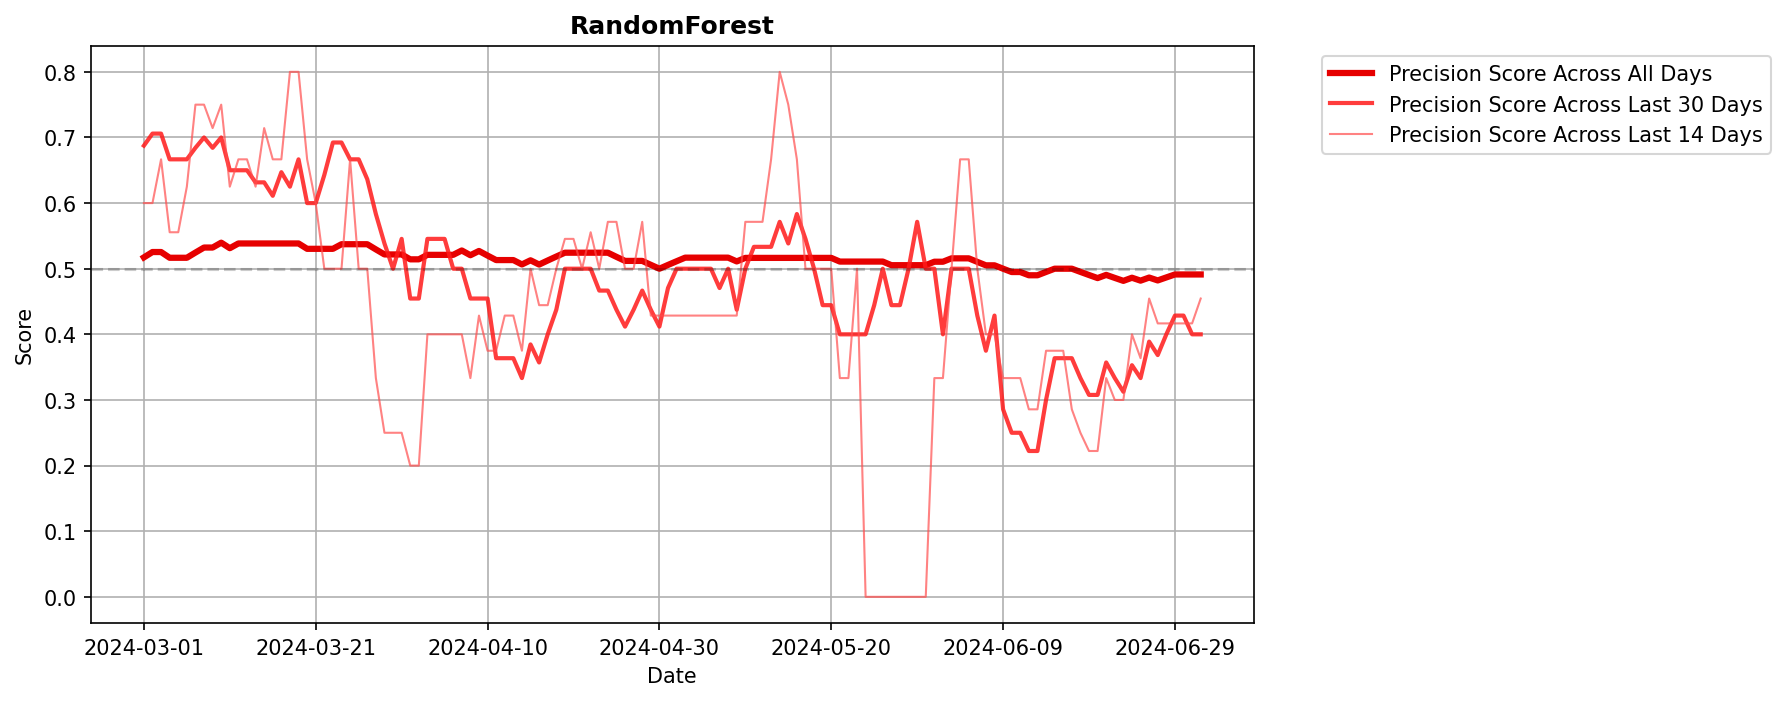

In [170]:
def get_plot(estimator: str, metrics: List[str], windows: List[str]):
    colormaps = {"recall": ["#3333ff", "#6666ff", "#9999ff", "#ccccff"],
                 "precision": ["#e60000", "#ff1a1a", "#ff4d4d", "#ff8080"],
                 "accuracy": ["#00cc00", "#00ff00", "#33ff33", "#66ff66"],
                 "specificity": ["#663300", "#994d00", "#cc6600", "#ff8000"],
                 "neg_pred_value": ["#990099", "#cc00cc", "#ff00ff", "#ff33ff"]}

    labels = []
    df = btc.modelDB.get_model_performance(estimator)
    fig, ax = plt.subplots(figsize=(10,5), dpi=150)
    for idx, metric in enumerate(metrics):
        for idx_lwa, window in enumerate(windows):
            df[["date", f"{metric}_{window}"]].plot(x="date", ax=ax, linewidth=len(windows)-idx_lwa, c=colormaps[metric][idx_lwa], alpha=1 - idx_lwa*0.15)
            labels.append(f"{metric.capitalize()} Score Across {'Last ' + window if window != 'total' else 'All'} Days")

    plt.axhline(0.5, linestyle="--", color="black", alpha=0.2)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels=labels)
    ax.set_title(estimator, weight="bold")
    ax.set_xlabel("Date")
    ax.set_ylabel("Score")

    return fig

get_plot("RandomForest", ["precision"], ["total", "30", "14"])

plt.show()

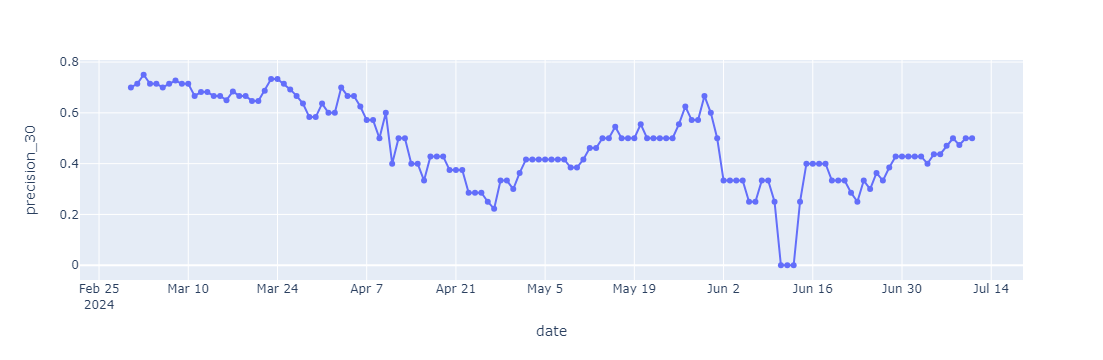

In [29]:
px.line(df, x="date", y="precision_14")
px.line(df, x="date", y="precision_30", markers=True)

0.55
0.61


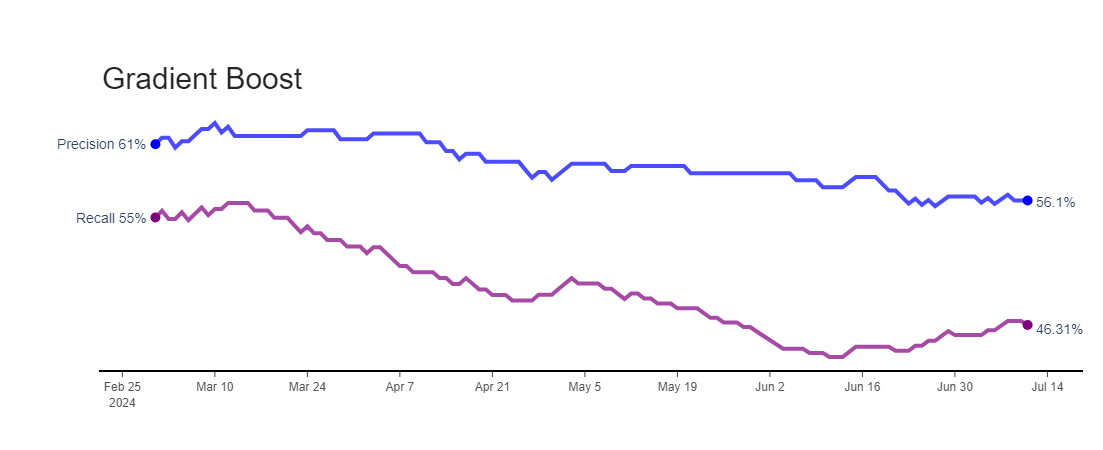

In [201]:
import plotly.graph_objects as go


# Create traces
fig_rf = go.Figure()
fig_rf.add_trace(go.Scatter(
                x=df["date"], 
                y=df["precision_total"],
                mode="lines",
                name="Precision Across All Time",
                opacity=0.7,
                line=dict(
                color='blue',   
                width=4)))
    
fig_rf.add_trace(go.Scatter(
                x=df["date"], 
                y=df["recall_total"],
                mode="lines",
                name="Recall Across All Time",
                opacity=0.7,
                line=dict(
                color='purple',   
                width=4)))

fig_rf.add_trace(go.Scatter(
                x=[df["date"].iloc[0], df["date"].iloc[-1]],
                y=[df["recall_total"].iloc[0], df["recall_total"].iloc[-1]],
                mode="markers",
                marker=dict(color="purple", size=10)))

fig_rf.add_trace(go.Scatter(
                x=[df["date"].iloc[0], df["date"].iloc[-1]],
                y=[df["precision_total"].iloc[0], df["precision_total"].iloc[-1]],
                mode="markers",
                marker=dict(color="blue", size=10)))

fig_rf.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(0, 0, 0)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=True,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# labels
for y_trace, label, color in zip([df["recall_total"], df["precision_total"]], ["Recall", "Precision"], ["purple", "blue"]):
    # left side annotation
    annotations.append(dict(xref='paper', x=0.05, y=y_trace.iloc[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(round(100*y_trace.iloc[0])),
                                  font=dict(family='Arial',
                                            size=14),
                                  showarrow=False))
    # right side annotation
    print(round(y_trace.iloc[0], 2))
    annotations.append(dict(xref='paper', x=0.95, y=round(y_trace.iloc[-1], 2),
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(round(100*y_trace.iloc[-1], 2)),
                                  font=dict(family='Arial',
                                            size=14),
                                  showarrow=False))

# title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Gradient Boost',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig_rf.update_layout(annotations=annotations)


fig_rf.show()

In [255]:
from typing import List



class GraphBTC:


    def __init__(self, model: str, performance_data: pd.DataFrame, windows: List[str]):
        self.label = model
        self.performance_data = performance_data

        self.figure = go.Figure()
        self.annotations = []

        for color, metric in zip(["blue", "purple"], ["precision", "recall"]):
            for window in windows:
                self.add_line(metric, window, color)
                self.add_points(metric, window, color)
                
        for window in windows:
            self.annotate(window)
        
        self.set_layout()
        self.add_title()

        self.figure.update_layout(annotations=self.annotations)

    
    def add_line(self, metric: str, window: str, color: str) -> None:
        self.figure.add_trace(go.Scatter(
                x=self.performance_data["date"], 
                y=self.performance_data[f"{metric}_{window}"],
                mode="lines",
                name=f"{metric.capitalize()} Across All Time",
                opacity=0.7,
                line=dict(
                color=color,   
                width=4)))
        

    def add_points(self, metric: str, window: str, color: str) -> None:
        self.figure.add_trace(go.Scatter(
                        x=[self.performance_data["date"].iloc[0], self.performance_data["date"].iloc[-1]],
                        y=[self.performance_data[f"{metric}_{window}"].iloc[0], self.performance_data[f"{metric}_{window}"].iloc[-1]],
                        mode="markers",
                        marker=dict(color=color, size=10)))
        
    
    def set_layout(self) -> None:
        self.figure.update_layout(
            xaxis=dict(
                showline=True,
                showgrid=True,
                showticklabels=True,
                linecolor='rgb(0, 0, 0)',
                linewidth=2,
                ticks='outside',
                tickfont=dict(
                    family='Arial',
                    size=12,
                    color='rgb(82, 82, 82)',
                ),
            ),
            yaxis=dict(
                showgrid=True,
                zeroline=False,
                showline=True,
                showticklabels=False,
            ),
            autosize=False,
            margin=dict(
                autoexpand=False,
                l=100,
                r=20,
                t=110,
            ),
            showlegend=False,
            plot_bgcolor='white'
        )

    
    def annotate(self, window: str) -> None:
        
        for y_trace, label, color in zip([self.performance_data[f"recall_{window}"], self.performance_data[f"precision_{window}"]], ["Recall", "Precision"], ["purple", "blue"]):
            # left side annotation
            self.annotations.append(dict(xref='paper', x=0.05, y=y_trace.iloc[0],
                                        xanchor='right', yanchor='middle',
                                        text=label + ' {}%'.format(round(100*y_trace.iloc[0])),
                                        font=dict(family='Arial',
                                                    size=14,
                                                    color=color),
                                        showarrow=False))
            # right side annotation
            self.annotations.append(dict(xref='paper', x=0.95, y=round(y_trace.iloc[-1], 2),
                                        xanchor='left', yanchor='middle',
                                        text='{}%'.format(round(100*y_trace.iloc[-1], 2)),
                                        font=dict(family='Arial',
                                                    size=14,
                                                    color=color),
                                        showarrow=False))
        

    def add_title(self) -> None:
        self.annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                    xanchor='left', yanchor='bottom',
                                    text=self.label.capitalize(),
                                    font=dict(family='Arial',
                                                size=30,
                                                color='rgb(37,37,37)'),
                                    showarrow=False))

    def get_graph(self) -> go.Figure:
        return self.figure

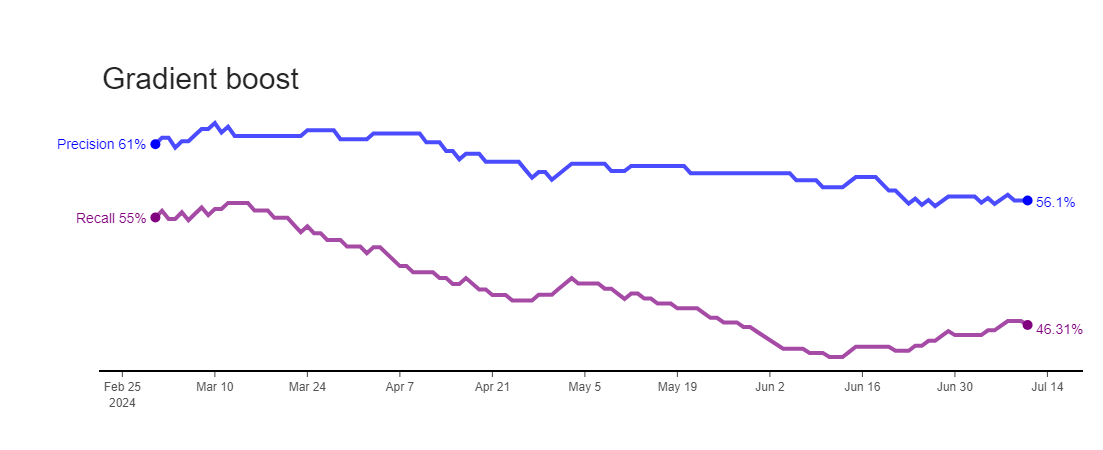

In [265]:
figure = GraphBTC("Gradient Boost", df, ["total"]).get_graph()
figure.show()